In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [77]:
from google.colab import files
uploaded = files.upload()

Saving Phishing_Email.csv to Phishing_Email (1).csv


In [78]:
#Reading the uploaded file
df = pd.read_csv('Phishing_Email.csv', encoding='latin-1')

In [80]:
# Install necessary libraries
!pip install scikit-learn xgboost

In [79]:
df.head()


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [81]:
df.sample(10)

,Unnamed: 0,Email Text,Email Type
15263,15264,l2 theory job ad the linguistics program at th...,Safe Email
6964,6965,"\nForwarded-by: Nev Dull \nForwarded-by: ""KOLE...",Safe Email
4306,4306,"oneok westex transmission interconnect , ward ...",Safe Email
15046,15047,prodigious nfl picks hello sportsfans ! ! ! ! ...,Phishing Email
8859,8860,"re : ou candidates sally , chris hanz has bloc...",Safe Email
17421,17422,clear benefits of creative design lt is really...,Phishing Email
15406,15407,"\n> hmm, I've never used gentoo\n> so I'll hav...",Safe Email
3329,3329,"URL: http://www.newsisfree.com/click/-4,826064...",Safe Email
5318,5318,"hpl nom for march 30 , 2001 ( see attached fil...",Safe Email
8455,8456,como sacar un password de hotmail . . . . . . ...,Phishing Email


**Data Cleaning**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [18]:
# Step 1: Check for missing values
missing_values = df.isnull().sum()

In [21]:
# Step 2: Remove duplicates
data_cleaned = df.drop_duplicates()

In [22]:
# Check NAN values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,0
Email Type,0


In [25]:
#dataset shape
df.shape

(18634, 3)

In [26]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [75]:
# Cleaning the text data in "Email Text" column
def clean_text(text):
    # Remove non-alphabetic characters (special characters, numbers, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

In [76]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [68]:
# Apply text cleaning to the "Email Text" column
data_cleaned['Email Text'] = data_cleaned['Email Text'].astype(str)
data_cleaned['Email Text'] = data_cleaned['Email Text'].apply(clean_text)

In [69]:
# Labeling encoding for the "Email Type" column
label_encoder = LabelEncoder()
data_cleaned['Email Type'] = label_encoder.fit_transform(data_cleaned['Email Type'])

In [100]:
#Add the 'Email Length' feature
data_cleaned['Email Length'] = data_cleaned['Email Text'].apply(len)

# Step 2: Add 'Capital Letters Count' feature
data_cleaned['Capital Letters Count'] = data_cleaned['Email Text'].apply(lambda x: sum(1 for c in x if c.isupper()))

# Step 3: Add 'Avg Word Length' feature
data_cleaned['Avg Word Length'] = data_cleaned['Email Text'].apply(lambda x: np.mean([len(word) for word in x.split()]))


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [101]:
# Display the first few rows of the cleaned dataset
data_cleaned.head()

,Unnamed: 0,Email Text,Email Type,Email Length,Capital Letters Count,Avg Word Length
0,0,re disc uniformitarianism re sex lang dick hud...,1,905,0,4.177143
1,1,the other side of galicismos galicismo is a sp...,1,443,0,5.082192
2,2,re equistar deal tickets are you still availab...,1,964,0,4.273224
3,3,hello i am your hot lil horny toy i am the one...,0,479,0,4.161290
4,4,software at incredibly low prices lower draper...,0,384,0,5.111111


**EDA**

In [102]:
# Step 1: Data Summary
data_summary = data_cleaned.describe()
print("Data Summary:")
print(data_summary)

Data Summary:
         Unnamed: 0    Email Type  Email Length  Capital Letters Count  \
count  18634.000000  18634.000000  1.863400e+04                18634.0   
mean    9328.282226      0.607599  2.342519e+03                    0.0   
std     5384.237476      0.488298  1.045830e+05                    0.0   
min        0.000000      0.000000  0.000000e+00                    0.0   
25%     4666.250000      0.000000  3.380000e+02                    0.0   
50%     9329.500000      1.000000  7.220000e+02                    0.0   
75%    13991.750000      1.000000  1.577750e+03                    0.0   
max    18650.000000      1.000000  1.426856e+07                    0.0   

       Avg Word Length  
count     18630.000000  
mean          5.116910  
std           3.057261  
min           1.207885  
25%           4.538462  
50%           4.937500  
75%           5.398216  
max         385.428571  


<ipython-input-103-1c9751fe59c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Email Type', data=data_cleaned, palette='Set2')


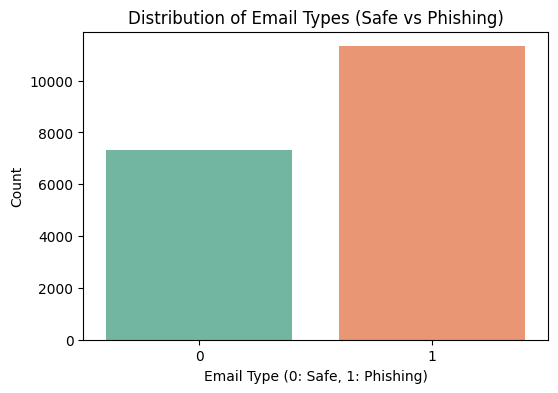

In [103]:
# Distribution of Email Types (Safe vs Phishing)
plt.figure(figsize=(6, 4))
sns.countplot(x='Email Type', data=data_cleaned, palette='Set2')
plt.title('Distribution of Email Types (Safe vs Phishing)')
plt.xlabel('Email Type (0: Safe, 1: Phishing)')
plt.ylabel('Count')
plt.show()

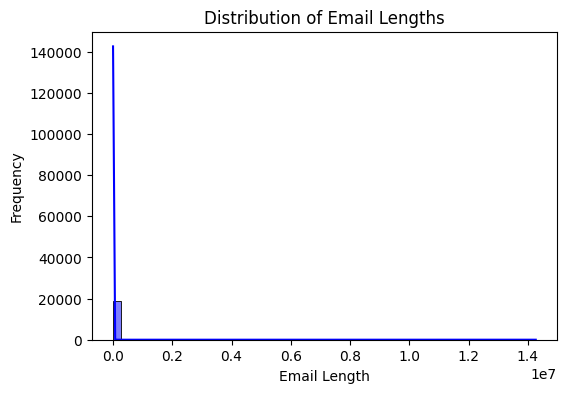

In [104]:
#Distribution of Email Lengths
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['Email Length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.show()

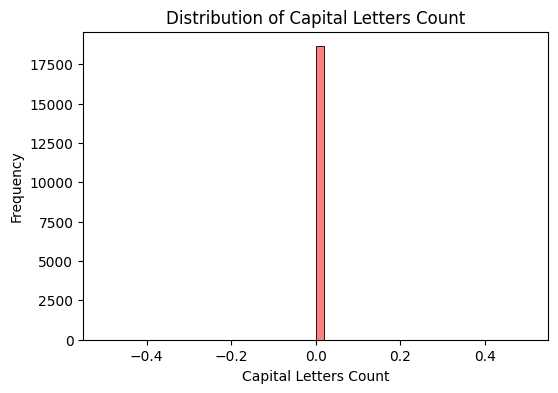

In [105]:
#Distribution of Capital Letters Count
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['Capital Letters Count'], bins=50, kde=True, color='red')
plt.title('Distribution of Capital Letters Count')
plt.xlabel('Capital Letters Count')
plt.ylabel('Frequency')
plt.show()

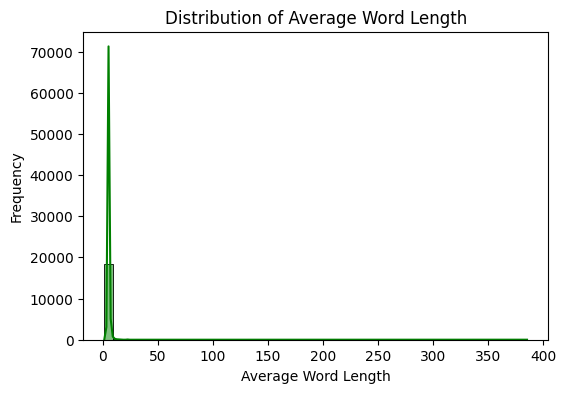

In [106]:
#Distribution of Average Word Length
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['Avg Word Length'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

In [108]:
#Correlation Analysis
correlation_matrix = data_cleaned[['Email Length', 'Capital Letters Count', 'Avg Word Length', 'Email Type']].corr()


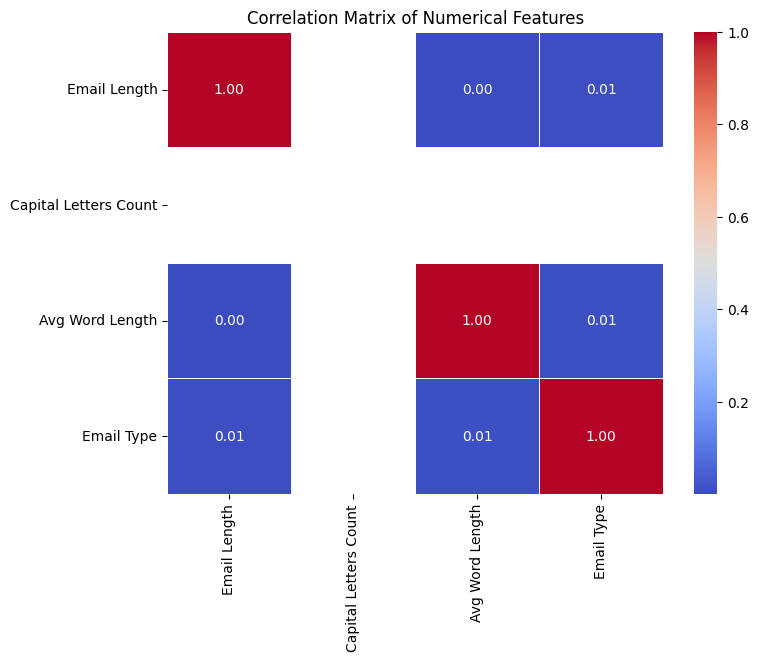

In [109]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Data Preprocessing**

In [110]:
# Converting "Email Text" to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_cleaned = tfidf_vectorizer.fit_transform(data_cleaned['Email Text'])
y_cleaned = data_cleaned['Email Type']

In [111]:
#Show the number of missing values and the cleaned data sample
missing_values, data_cleaned

(Unnamed: 0    0
 Email Text    0
 Email Type    0
 dtype: int64,
        Unnamed: 0                                         Email Text  \
 0               0  re disc uniformitarianism re sex lang dick hud...   
 1               1  the other side of galicismos galicismo is a sp...   
 2               2  re equistar deal tickets are you still availab...   
 3               3  hello i am your hot lil horny toy i am the one...   
 4               4  software at incredibly low prices lower draper...   
 ...           ...                                                ...   
 18645       18646  date a lonely housewife always wanted to date ...   
 18646       18647  request submitted access request for anita dup...   
 18647       18648  re important prc mtg hi dorn john as you disco...   
 18648       18649  press clippings letter on californian utilitie...   
 18649       18650                                              empty   
 
        Email Type  Email Length  Capital Letters Count 

In [112]:
df.shape

(18650, 3)

In [113]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [114]:
df.sample(20)

,Unnamed: 0,Email Text,Email Type
9017,9018,top quality prescription here casework first a...,Phishing Email
863,863,california update 3 / 15 / 01 executive summar...,Safe Email
12576,12577,re : personal dear mr . kaminski : thank you v...,Safe Email
16241,16242,english is an asian language conference the ma...,Safe Email
1384,1384,did you get your information yet ? a vacation ...,Phishing Email
9161,9162,"re : global risk management operations rick , ...",Safe Email
9541,9542,"the technews - bulletin , may 2005 mobile prod...",Phishing Email
17635,17636,solid new homes in 24 hours . hows it going ? ...,Phishing Email
18551,18552,the houston expl dec 2000 daren : i ' m not su...,Safe Email
18084,18085,"you havent already, spamd has to be restarted....",Safe Email


In [116]:
# Step 2: Split the data into training and test sets (70% train, 30% test)
# Replace X and y with your feature matrix (X_cleaned) and target variable (y_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

In [118]:
# Check the shape of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (13043, 5000)
Test data shape: (5591, 5000)


In [117]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [86]:
df.sample(20)


,Unnamed: 0,Email Text,Email Type
7940,7941,new research institute g . a . i . l . a . _ _...,Safe Email
6395,6395,"\n""John P. Looney"" a ÃÂ©crit:> > I'm confuse...",Safe Email
3072,3072,\nHello Unlimited International Telephone Call...,Phishing Email
13182,13183,"\nDear \nFriend,A recent survey by Nielsen/Net...",Phishing Email
8527,8528,order xÃ¤Ã±Ã¤x - no prÃ«scrÃ®ptiÃ²n required x...,Phishing Email
4525,4525,"Heh, ten years ago saying the exact same words...",Safe Email
359,359,re : here is our opportunity carey dusenburyco...,Phishing Email
9157,9158,How do I install / add an additional service p...,Safe Email
16097,16098,Carlos Luna wrote:>Hi all.\n>Does anyone know ...,Safe Email
16334,16335,"On Sun, Jul 21, 2002 at 11:12:34PM +0100, Paul...",Safe Email


****

**Model Training**

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [120]:
# Model 1: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [121]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_classification_report)


Random Forest Accuracy: 0.9590413164013594
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2240
           1       0.98      0.95      0.97      3351

    accuracy                           0.96      5591
   macro avg       0.96      0.96      0.96      5591
weighted avg       0.96      0.96      0.96      5591



In [60]:
# Model 2: Train an SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [62]:
# Make predictions and evaluate SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_classification_report)

SVM Accuracy: 0.9701305669826507
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2240
           1       0.99      0.96      0.97      3351

    accuracy                           0.97      5591
   macro avg       0.97      0.97      0.97      5591
weighted avg       0.97      0.97      0.97      5591



In [63]:
# Model 3: Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:41:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [64]:
# Make predictions and evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_classification_report = classification_report(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:")
print(xgb_classification_report)

XGBoost Accuracy: 0.9540332677517439
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2240
           1       0.98      0.95      0.96      3351

    accuracy                           0.95      5591
   macro avg       0.95      0.96      0.95      5591
weighted avg       0.96      0.95      0.95      5591



Model Comparison: Accuracy, Precision, Recall, and F1-Score

In [123]:
# Evaluate and compare models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [131]:
!pip install ace_tools # Install the missing package


In [132]:
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [127]:
# Collecting metrics for comparison
metrics = {
    'Model': ['Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [rf_accuracy, svm_accuracy, xgb_accuracy],
    'Precision (Phishing)': [
        precision_score(y_test, rf_predictions),
        precision_score(y_test, svm_predictions),
        precision_score(y_test, xgb_predictions)
    ],
    'Recall (Phishing)': [
        recall_score(y_test, rf_predictions),
        recall_score(y_test, svm_predictions),
        recall_score(y_test, xgb_predictions)
    ],
    'F1-Score (Phishing)': [
        f1_score(y_test, rf_predictions),
        f1_score(y_test, svm_predictions),
        f1_score(y_test, xgb_predictions)
    ]
}

metrics_df = pd.DataFrame(metrics)
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Comparison Metrics", dataframe=metrics_df) # Now the import should work as the package is installed.

metrics_df

ModuleNotFoundError: No module named 'ace_tools'